# Анализ окупаемости рекламы развлекательного приложения

# Оглавление

1. [Описание проекта](#description)
2. [Предобработка данных](#preprocessing)
3. [Анализ данных](#analisys)
4. [Проверка гипотез](#hypothesis)
5. [Выводы](#summary)

<a id="back_to_title"></a>

# Описание проекта

<a id="description"></a>

Исследование выполнено на основе данных развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

В наличии данные о визитах пользователей, их заказах, а также данные о расходах на рекламу.
- Цель исследования: 
 - изучить, откуда приходят пользователи и какими устройствами они пользуются,
 - изучить, сколько стоит привлечение пользователей из различных рекламных каналов;
 - изучить, сколько денег приносит каждый клиент,
 - понять, когда расходы на привлечение клиента окупаются,
 - понять, какие факторы мешают привлечению клиентов.
- Ход исследования: общее ознакомление с имеющимися данными. Изучение данных на ошибки и пропуски, заполнение пропущенных значений и исправление ошибок. Исследовательский анализ данных.

В ходе исследовательского анализа данных выполню следуюшие шаги:

- Составлю профили пользователей. Определю минимальную и максимальную даты привлечения пользователей.
- Выясню, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаю, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучу рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

- Посчитаю общую сумму расходов на маркетинг.
- Выясню, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнаю, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использую профили пользователей.


# Предобработка данных

<a id="preprocessing"></a>

[К ОГЛАВЛЕНИЮ](#back_to_title)

Импортирую нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загружу данные о визитах, заказах и рекламных расходах:

In [2]:
visits = pd.read_csv('/Users/tatanakondrahina/visits_info_short.csv')
orders = pd.read_csv('/Users/tatanakondrahina/orders_info_short.csv')
costs = pd.read_csv('/Users/tatanakondrahina/costs_info_short.csv')


#просмотрю содержимое датасетов
display(visits.head(3))
display(orders.head(3))
display(costs.head(3))


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


Изучу общую информацию о датафреймах:

In [3]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Проверю датасеты на наличие дубликатов: 

In [4]:
display(visits.duplicated().sum()) 
display(orders.duplicated().sum()) 
display(costs.duplicated().sum()) 

0

0

0

Пропущенных данных в датасетах нет, дубликаты также не обнаружены.  Но есть столбцы, требующие изменения типов данных. В датафрейме visits это Session Start и Session End.
В датафрейме orders это Event Dt. В датафрейме ad_costs это dt. Все трубемые столбцы нужно привести к временнОму типу данных. Также необходимо привести названия столбцом к змеиному стилю.


Переименую столбцы: 

In [5]:
#приведу строки к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

#изменю названия столбцов, в названии которых есть пробелы
visits.rename(columns = {'session start' : 'session_start', 'session end' : 'session_end', 'user id':'user_id'},inplace=True)
orders.rename(columns = {'user id' : 'user_id', 'event dt' : 'event_dt'},inplace=True)

#проверю изменения
display(visits.head(1))
display(orders.head(1))
display(costs.head(1))


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


Изменю тип данных указанных выше столбцов на временнОй: 

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

В ходе предобработки данных проанализировала датасеты на пропущенные значения и дубликаты. Пропущенных данных в датасетах нет, дубликаты также не обнаружены.  Выявлены столбцы, требующие изменения типов данных. В датафрейме visits это Session Start и Session End. В датафрейме orders это Event Dt. В датафрейме ad_costs это dt. Все указанные столбцы приведены к временнОму типу данных. Названия столбцом приведены к змеиному стилю.

Предобработка данных завершена. 

# Анализ данных

<a id="analisys"></a>

[К ОГЛАВЛЕНИЮ](#back_to_title)

Задам функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Задам функцию get_profiles() для создания профилей пользователей:

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # найду параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определю дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавлю признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # посчитаю количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединю траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # поделю рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавлю стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

Задам функцию get_retention() для подсчёта Retention Rate.

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляю столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираю «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаю таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Задам функцию get_conversion()для подсчёта конверсии:

In [9]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяю дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляю данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываю лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делю каждую «ячейку» в строке на размер когорты
        # и получаю conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираю 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаю таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Задам функцию get_ltv() для подсчёта LTV.

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляю данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитывюм лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строю «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # нахожу сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляю размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяю размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаю LTV: делю каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаю все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаю размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираю датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаю средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаю ROI: делю LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляю строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаю размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляю CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляю размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаю таблицы LTV и ROI
        return result, roi

    # получаю таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираю 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаю таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Задам функцию filter_data() для сглаживания данных.

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяю скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Задам функцию plot_retention() для построения графика Retention Rate.

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаю размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаю размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляю только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляю второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строю кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строю кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаю названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтрую данные и строю график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтрую данные и строю график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Задам функцию plot_conversion() для построения графика конверсии.

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаю размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаю размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляю только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Задам функцию plot_ltv_roi для визуализации LTV и ROI.

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаю сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаю размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляю только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишу в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаю размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляю только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Нужные функции заданы.

Составлю профили пользователей. Определю минимальную и максимальную даты привлечения пользователей.

In [15]:
events = []
profiles = get_profiles(visits, orders, costs)
profiles.head(5)
display(profiles['dt'].min())
display(profiles['dt'].max())


datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей - 1 мая 2019 г, максимальная - 27 октября 2019 г.

Выясню, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [16]:
profiles.head(
)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:

profiles_grouped = profiles.groupby( by='region').agg({'user_id': 'nunique','payer': 'mean'})
profiles_grouped['payer']=profiles_grouped['payer']*100
profiles_payers = profiles.query('payer==1').groupby( by='region').agg({'user_id': 'nunique'})
display(profiles_grouped)
display(profiles_payers)




,user_id,payer
region,,
France,17450,3.799427
Germany,14981,4.111875
UK,17575,3.982930
United States,100002,6.901862


,user_id
region,
France,663
Germany,616
UK,700
United States,6902


Пользователи приходят в приложение из Франции, Германии, Великобритании и США.
Наибольшая доля платящих пользователей приходится на США - 6,9%
В абсолютном значении наибольшее количество платящих пользователей также находится в США - 6902 пользователя.


Узнаю, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [18]:
profiles_device = profiles.groupby(by='device').agg({'user_id': 'nunique','payer': 'mean'})
profiles_device['payer']=profiles_device['payer']*100
profiles_payers_device = profiles.query('payer==1').groupby( by='device').agg({'user_id': 'nunique'})
display(profiles_device)
display(profiles_payers_device)

,user_id,payer
device,,
Android,35032,5.851793
Mac,30042,6.364423
PC,30455,5.046790
iPhone,54479,6.207897


,user_id
device,
Android,2050
Mac,1912
PC,1537
iPhone,3382


Пользователи приложения пользуются следующими устройствами:Android, Mac, PC, iPhone .
Наибольшая доля пользователей приходится на Mac - 6,3%
В абсолютном значении наибольшее количество платящих пользователей приходится на iPhone - 3382 пользователя.

Изучу рекламные источники привлечения и определю каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [19]:
profiles_channel = profiles.groupby(by='channel')\
                           .agg({'user_id': 'nunique','payer': 'mean'})
profiles_channel['payer']=profiles_channel['payer']*100
profiles_channel=profiles_channel.reset_index()\
                                 .sort_values(by='payer', ascending=False)

profiles_payers_channel = profiles.query('payer==1')\
                                  .groupby( by='channel')\
                                  .agg({'user_id': 'nunique'})
profiles_payers_channel = profiles_payers_channel.reset_index()\
                                                 .sort_values(by='user_id', ascending=False)
                                 
display(profiles_channel)
display(profiles_payers_channel)

,channel,user_id,payer
1,FaceBoom,29144,12.204914
0,AdNonSense,3880,11.340206
9,lambdaMediaAds,2149,10.469986
6,TipTop,19561,9.600736
5,RocketSuperAds,4448,7.913669
7,WahooNetBanner,8553,5.296387
8,YRabbit,4312,3.826531
3,MediaTornado,4364,3.574702
2,LeapBob,8553,3.063253
4,OppleCreativeMedia,8605,2.707728


,channel,user_id
1,FaceBoom,3557
6,TipTop,1878
10,organic,1160
7,WahooNetBanner,453
0,AdNonSense,440
5,RocketSuperAds,352
2,LeapBob,262
4,OppleCreativeMedia,233
9,lambdaMediaAds,225
8,YRabbit,165


Наибольшая доля платящих пользователей приходится на канал FaceBoom  - 12,2%
В абсолютном значении наибольшее количество платящих пользователей также приходится на канал FaceBoom - 3557 пользователя.

Посчитаю общую сумму расходов на маркетинг.

In [20]:
total_costs=costs['costs'].sum()
display(total_costs)



105497.30000000002

Общие расходы на рекламу составили 105497

Выясню, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [21]:
channels_costs = profiles.groupby(by='channel')\
                         .agg({'acquisition_cost':'sum'})
channels_costs = channels_costs.reset_index()\
                               .sort_values(by='acquisition_cost', ascending=False)

#считаю общие затраты на рекламу
costs_total = channels_costs['acquisition_cost'].sum()

#добавляю колонку с долей затрат по каждому каналу
channels_costs['rate']= channels_costs['acquisition_cost']*100/costs_total
channels_costs

,channel,acquisition_cost,rate
6,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
7,WahooNetBanner,5151.00,4.882589
0,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
2,LeapBob,1797.60,1.703930
9,lambdaMediaAds,1557.60,1.476436
3,MediaTornado,954.48,0.904744
8,YRabbit,944.22,0.895018


Лидер затрат на рекламу - канал TipTop. На него тратится 50% рекламного бюджета.

Построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отражу это на одном графике.

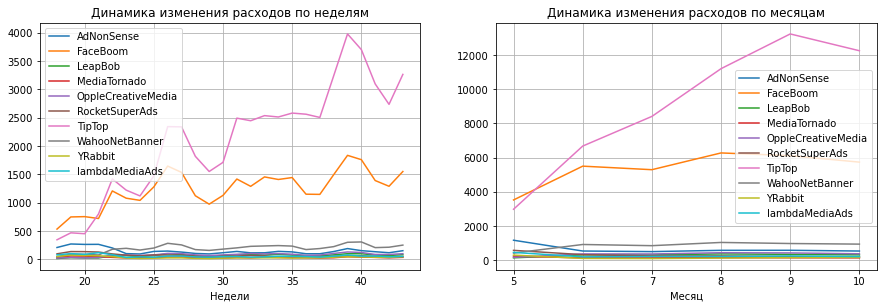

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
 
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid=True,ax=ax1,figsize=(15,10))
plt.legend()
plt.xlabel('Недели')
plt.title('Динамика изменения расходов по неделям')
 
ax2 = fig.add_subplot(2,2,2)
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot( grid=True,ax=ax2,figsize=(15,10))
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов по месяцам')
 
plt.show()

Динамика расходов по источнику TipTop растет и в разрезе недель, и в разрезе месяцев.
Динамика расходов по источнику FaceBoom также растет и в разрезе недель, и в разрезе месяцев, но не так выраженно, как по TipTop.
По остальным источникам динамика расходов более-менее стабильна, как в разрезе месяцев, так и в разрезе недель.

Узнаю, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использую для этого профили пользователей.

In [23]:
cac=profiles.groupby(by='channel').agg({'user_id':'count', 'acquisition_cost':'sum'})
cac['cac']=cac['acquisition_cost']/cac['user_id']
cac = cac.reset_index().sort_values(by='cac',ascending=False)
cac

,channel,user_id,acquisition_cost,cac
6,TipTop,19561,54751.30,2.799003
1,FaceBoom,29144,32445.60,1.113286
0,AdNonSense,3880,3911.25,1.008054
9,lambdaMediaAds,2149,1557.60,0.724802
7,WahooNetBanner,8553,5151.00,0.602245
5,RocketSuperAds,4448,1833.00,0.412095
4,OppleCreativeMedia,8605,2151.25,0.250000
8,YRabbit,4312,944.22,0.218975
3,MediaTornado,4364,954.48,0.218717
2,LeapBob,8553,1797.60,0.210172


Самый выскокий показатель САС в каналах TipTop и FaceBoom - 2.7 и 1.11.
Самые "дешевые" пользователи пришли из каналов LeapBob, MediaTornado и YRabbit , где САС составил 0.21.

Рассчитаю средний CAC на одного пользователя для всего проекта. Так будет понятно,  на сколько выше среднего САС у популярных каналов. 

In [24]:
(cac['acquisition_cost'].sum())/(cac['user_id'].sum())

0.703277825182657

Седний САС = 0.7. Таким образом, САС выше среднего имеют каналы: lambdaMediaAds, AdNonSense, FaceBoom, TipTop.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализирую окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. Построю и изучу графики конверсии и удержания.
- Проанализирую окупаемость рекламы с разбивкой по устройствам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Отвечу на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Проанализируюокупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

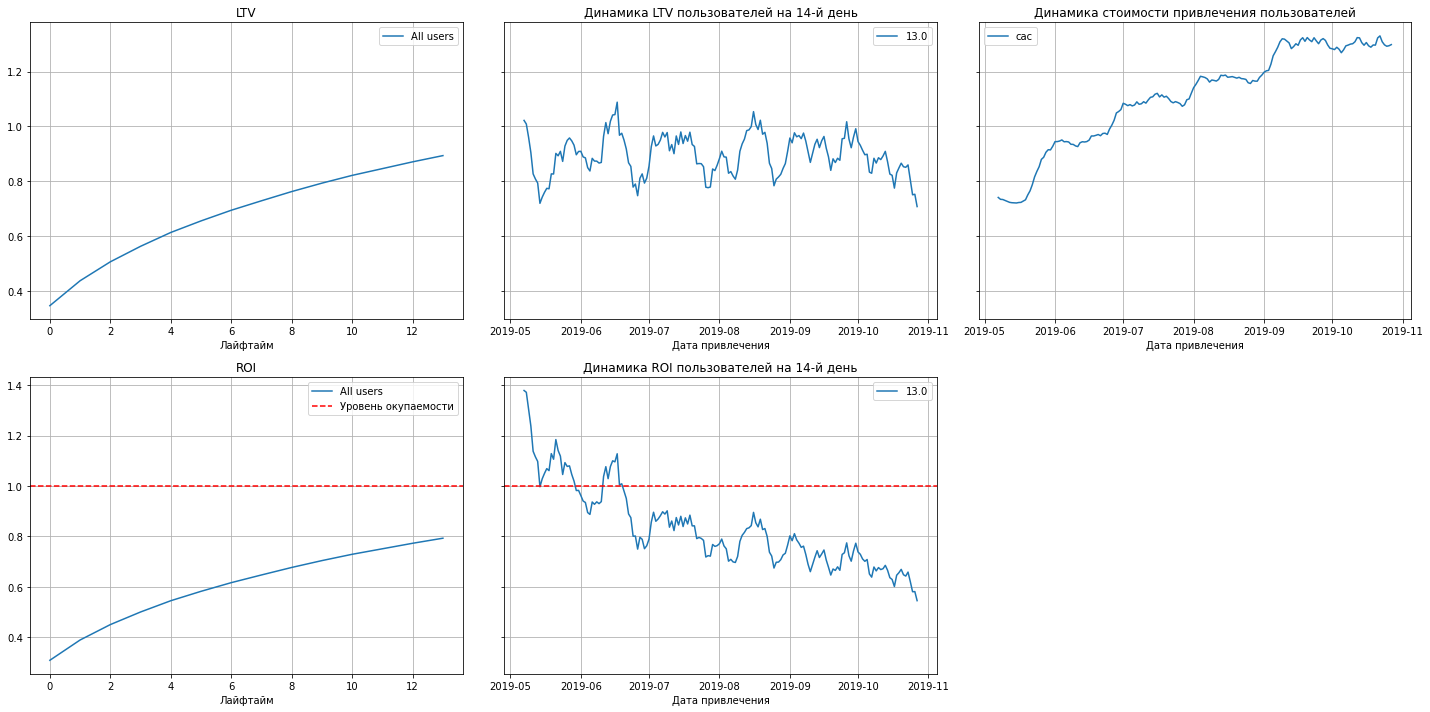

In [25]:
observation_date = datetime(2020, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

profiles_new = profiles.query('channel!="organic"') #исключаю из анализа органических пользователей

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days
)

# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


 - Реклама не окупается. ROI стремительно снижается на протяжениии двух недель
 - САС неуклонно растет
 - LTV к 14 дню закономерно растет,
 - LTV на 14 день имеет сезонность, но в целом стабилен.
 

Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. Построю и изучу графики конверсии и удержания

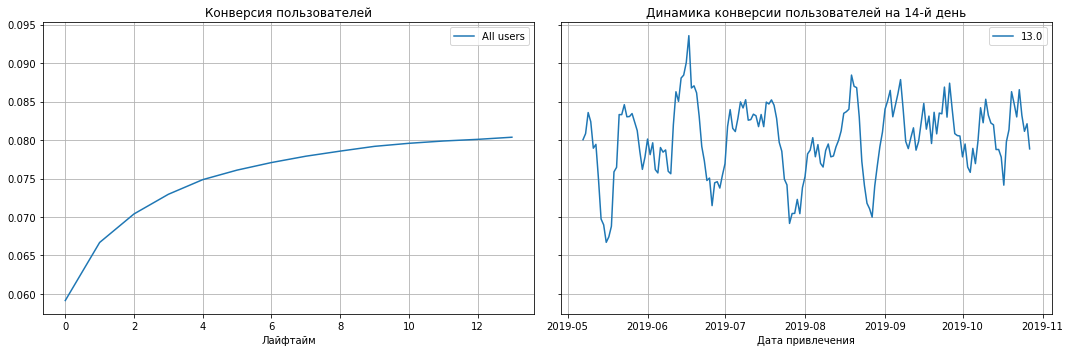

In [26]:
# смотрю конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

К 14 дню конверсия составляет более 5% - хороший показатель.  При этом конверсия делает скачок для пользователей, привлеченных после 6 ноября

Построю и проанализирую графики конверсии пользователей по странам\каналам\устройствам. 

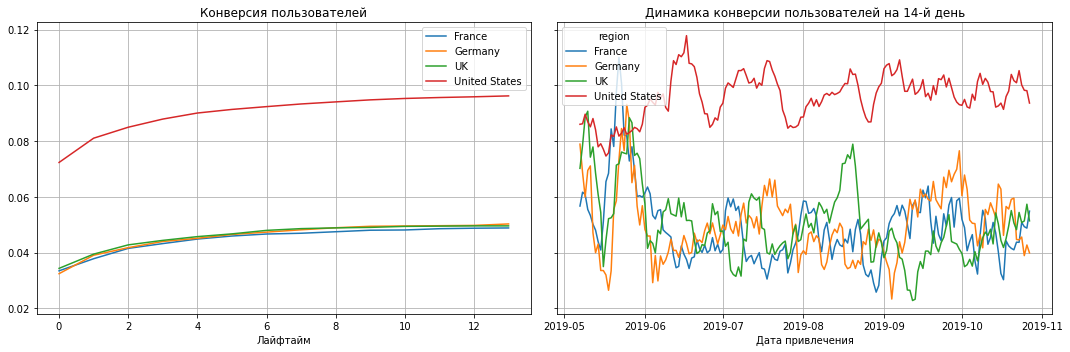

In [27]:
dimensions = ['region'] # конверсия по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days,dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США значительно выше конверсии по другим странам. 

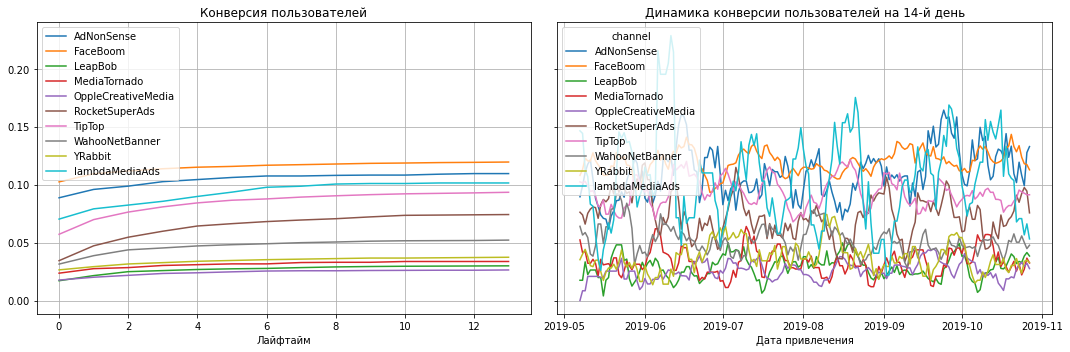

In [28]:
dimensions = ['channel'] # конверсия по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days,dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

ТОП -3 канала по конверсии :  FaceBoom, AdNonSense, LambdaNediaAds. Самая низкая конверсия по пользователям, пришедшим органически. 

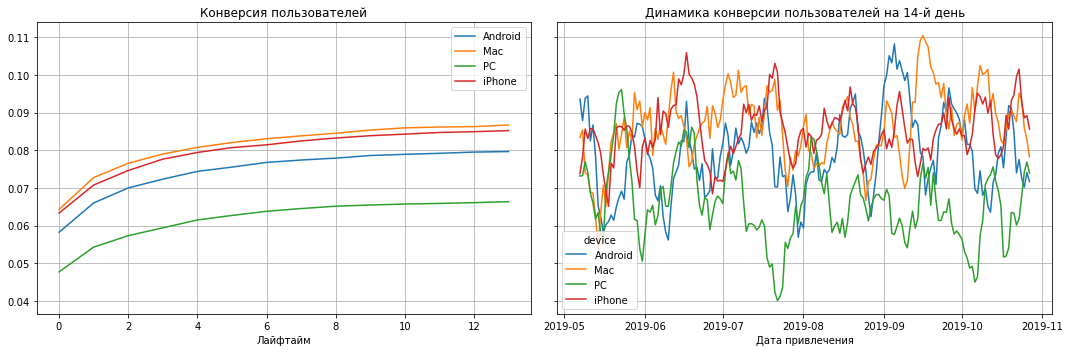

In [29]:
dimensions = ['device'] # конверсия по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days,dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая низкая конверсия по пользователям PC, самая высокая - у пользователей  Mac и Iphone

Теперь построю и проанализирую графики удержания

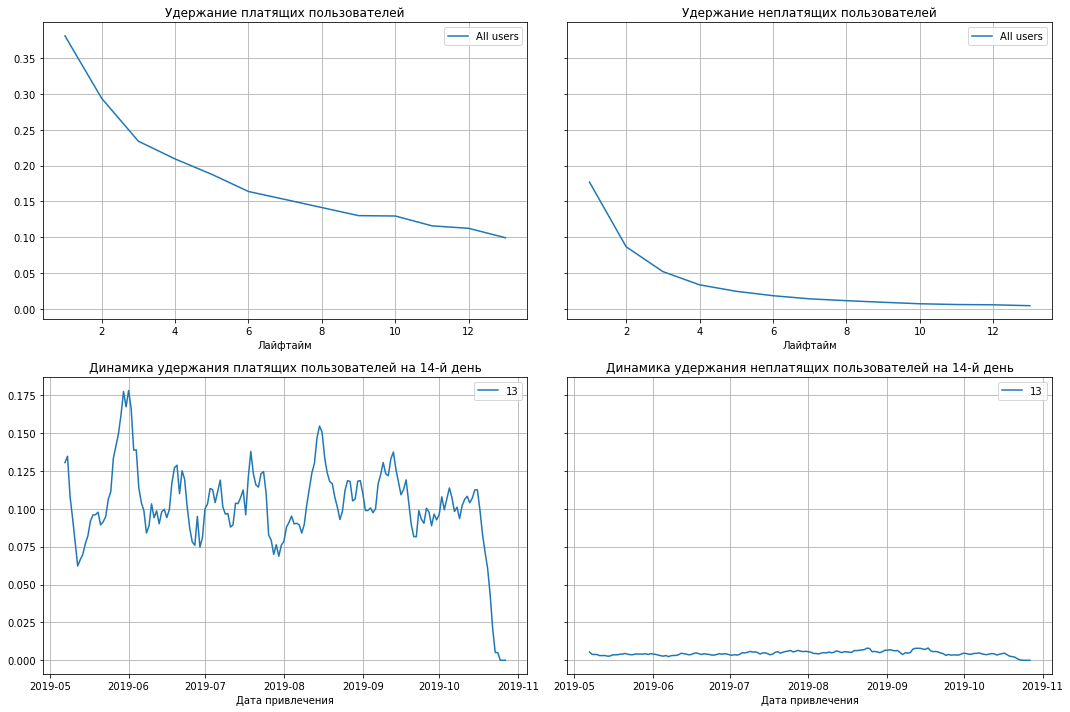

In [30]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание неплатящих пользователей ожидаемо ниже, чем платящих.

Построю и проанализирую графики удержания пользователей по странам\каналам\устройствам. 

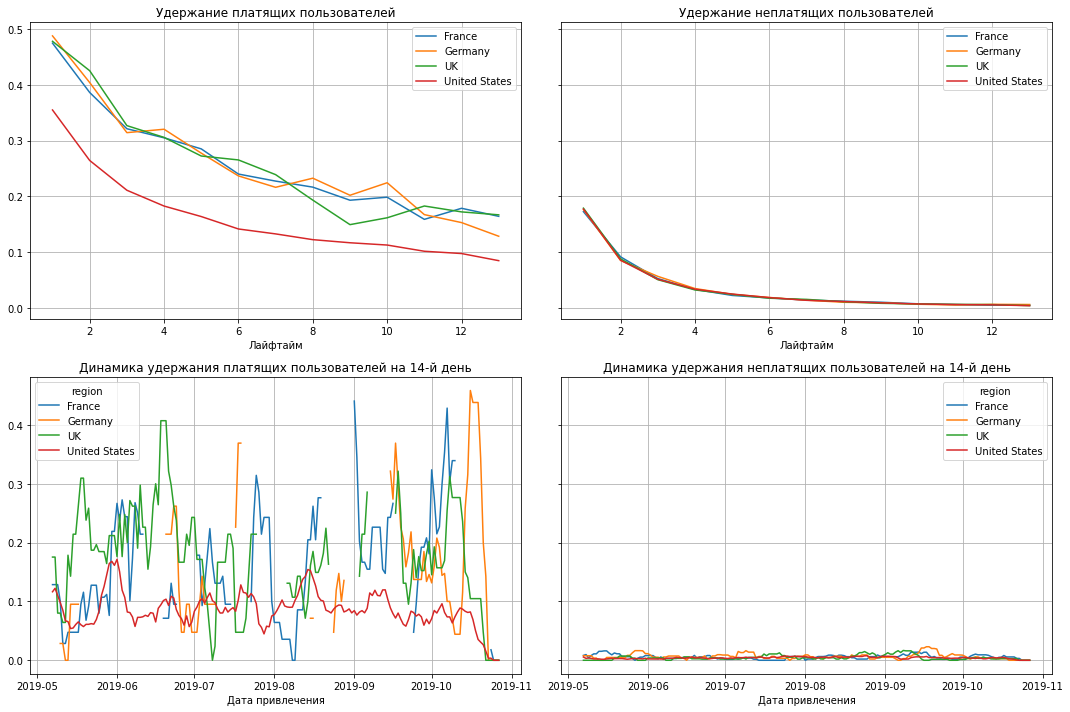

In [31]:
dimensions = ['region'] #удержание по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days,dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самое низкое удержание у пользователей из США, остальные страны находятся примерно на одном уровне. Динамика удержания на 14 дней имеет сезонность, но в целом стабильна по всем странам. 

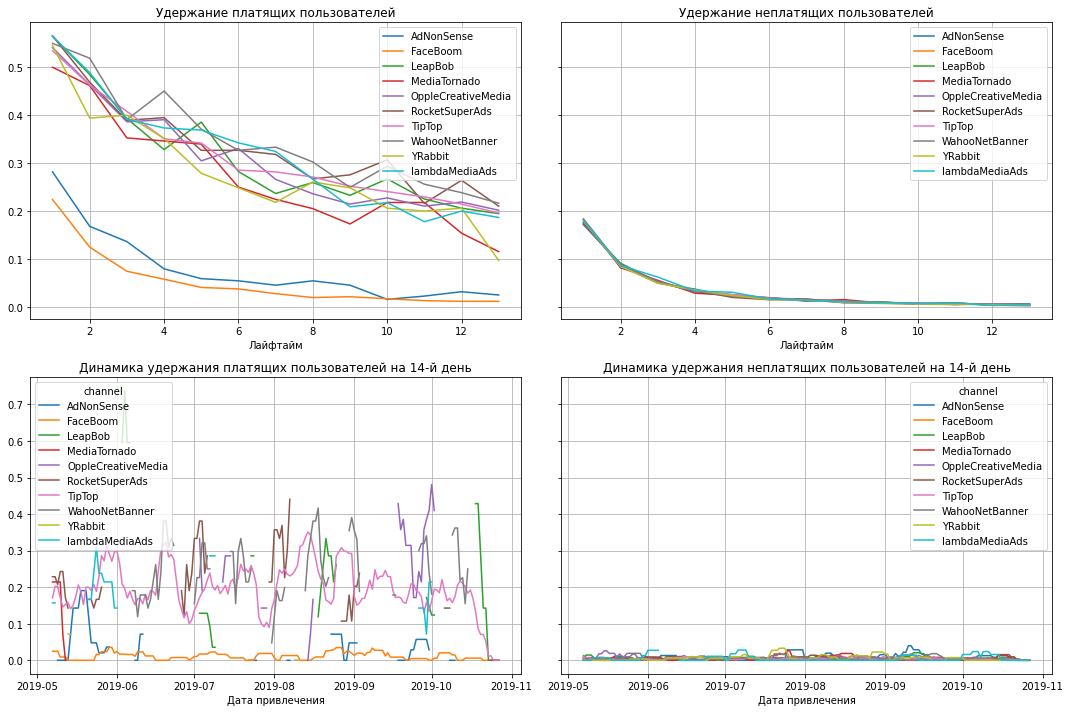

In [32]:
dimensions = ['channel'] #удержание по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days,dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по каналам AdNonSense и FaceBoom существенно ниже, чем удержание по другим каналам. 

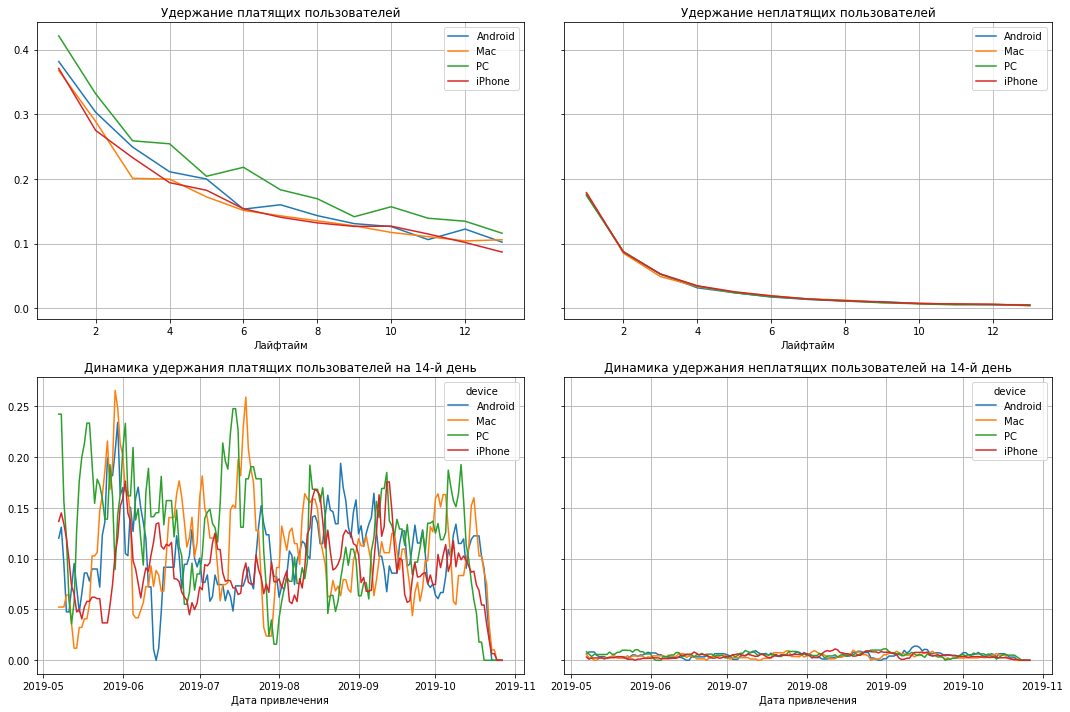

In [33]:
dimensions = ['device'] #удержание по устройствам 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days,dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользвателей PC немного выше, чем по остальным устройствам. Но в целом удержание по всем типам устройств более-менее одинаковое. 

Проанализирую окупаемость рекламы с разбивкой по устройствам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

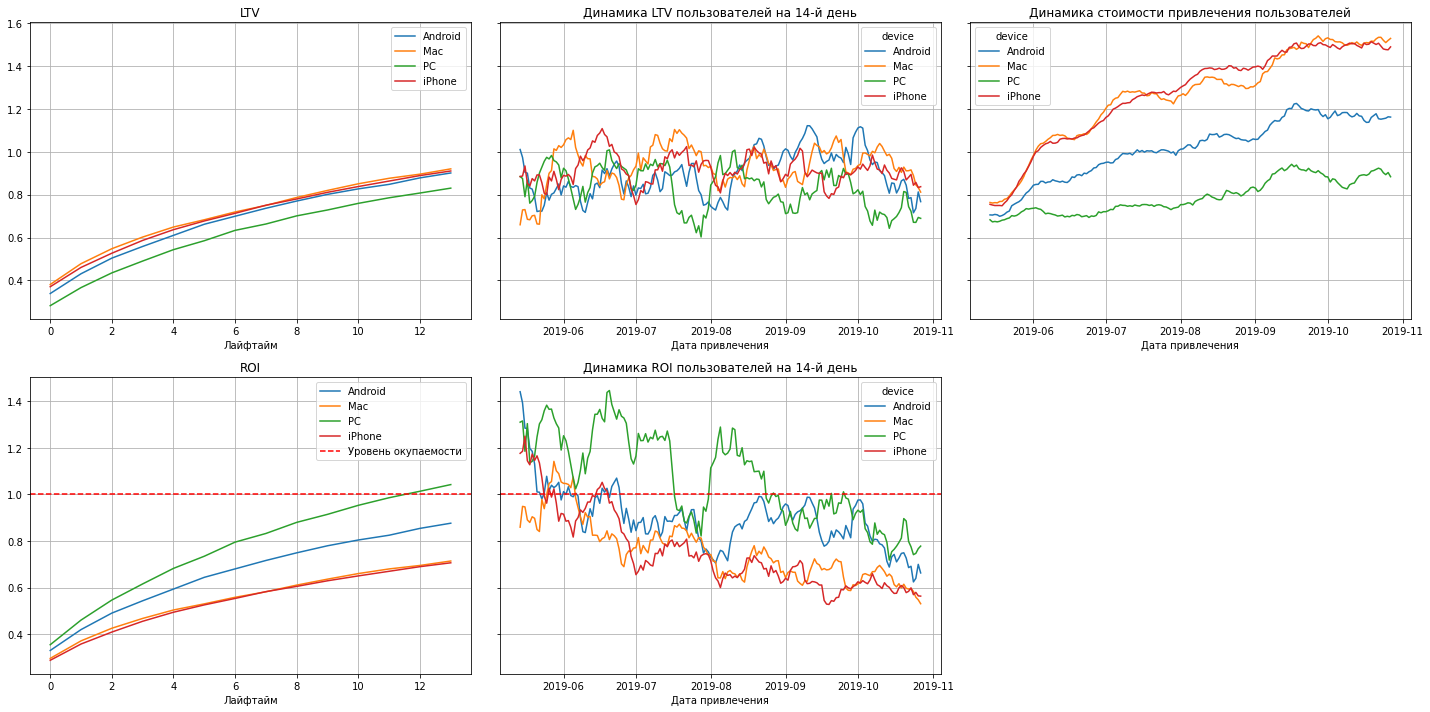

In [34]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

К 14 лайфтайму начинает окупаться реклама только у пользователей PC. При этом ROI для всех устройств падает в более поздних когортах на 14 день. 
САС для пользователей всех устройств растет в динамике. 

Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

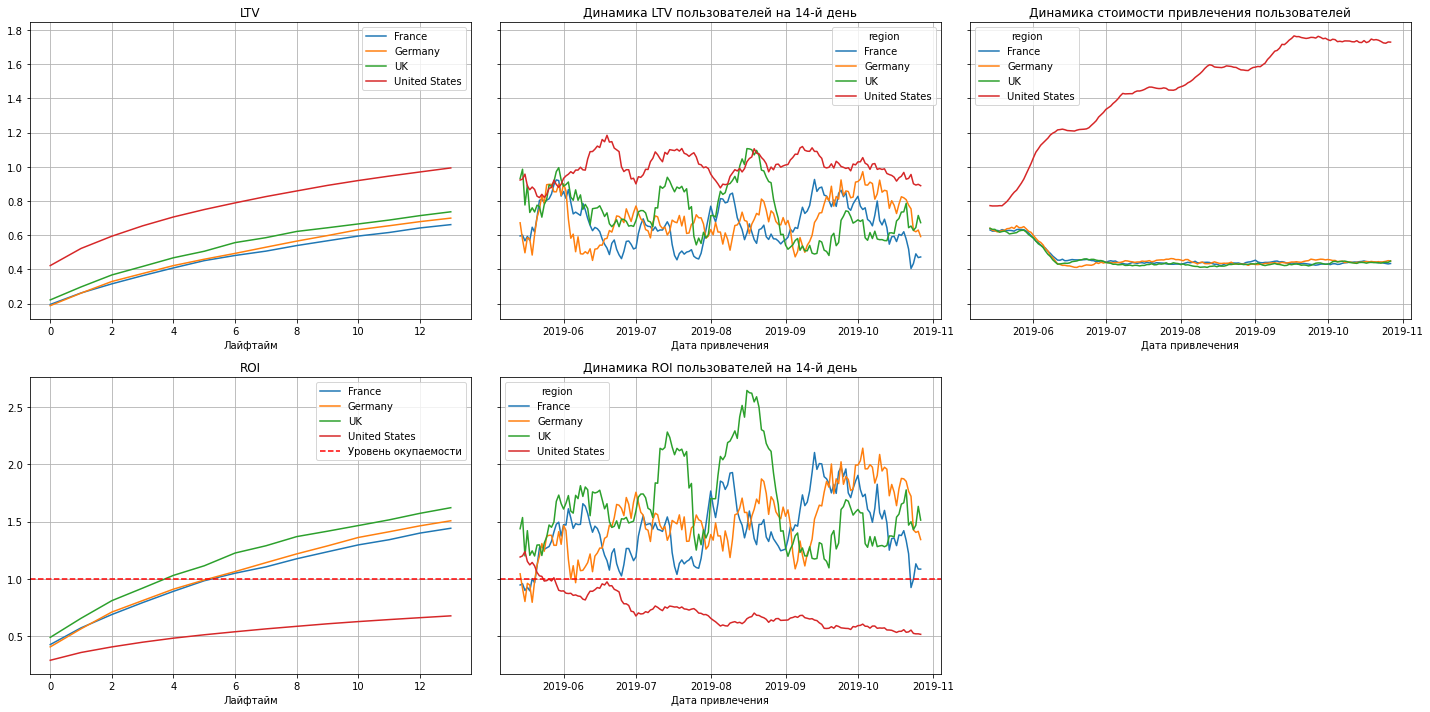

In [35]:
# смотрю окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стабильно окупается реклама во всех странах кроме США. При этом САС для США стремительно растет по сравнению с остальными регионами. Вероятнее всего бюджте рекламы для США начали расходовать крайне неэффективно.

Посмотрю глубже на рекламу в США в разрезе каналов и устройств.

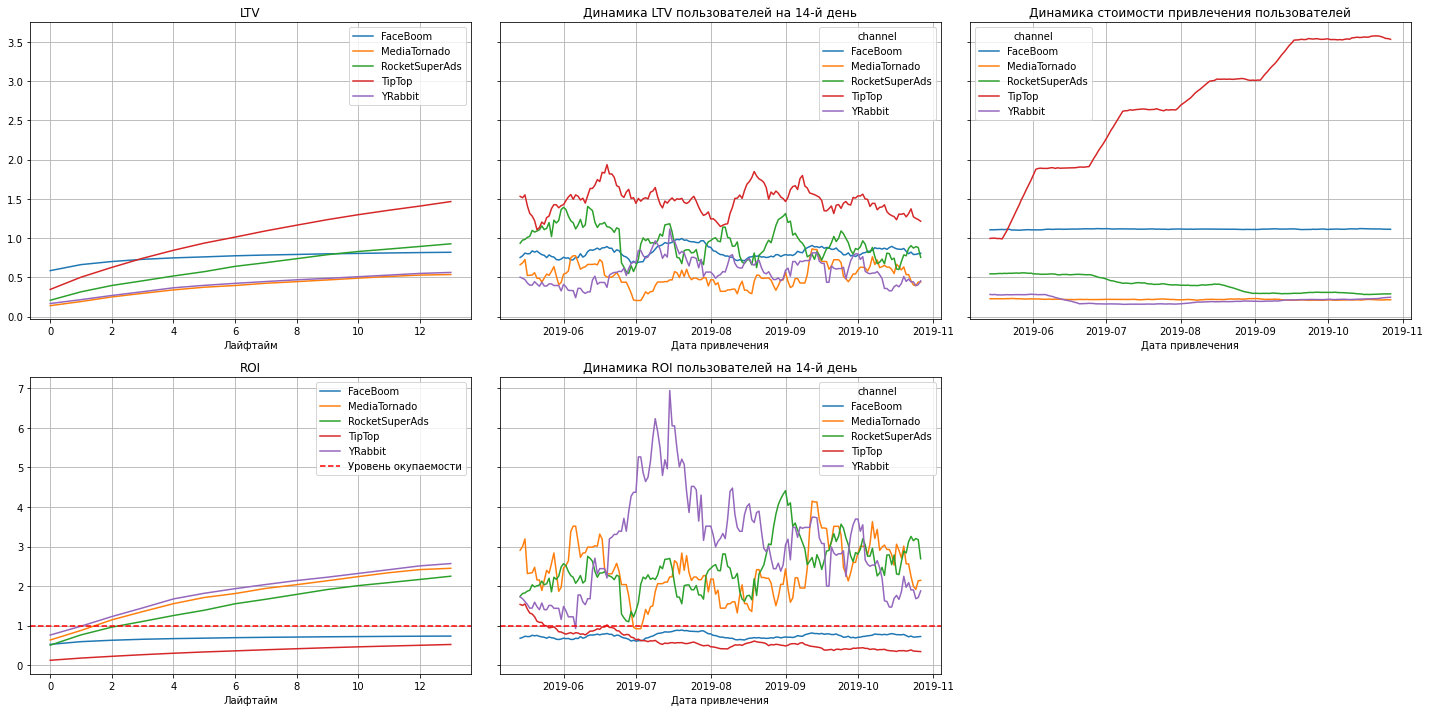

In [36]:
profiles_usa = profiles_new.query('region=="United States"')#выбираем пользователей из США

dimensions = ['channel'] #смотрим окупаемость в разбивке по каналам в США 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стоимость привлечения в канале TipTop в США значительно выше, чем в других каналах. Стоит обратить на это внимание. 

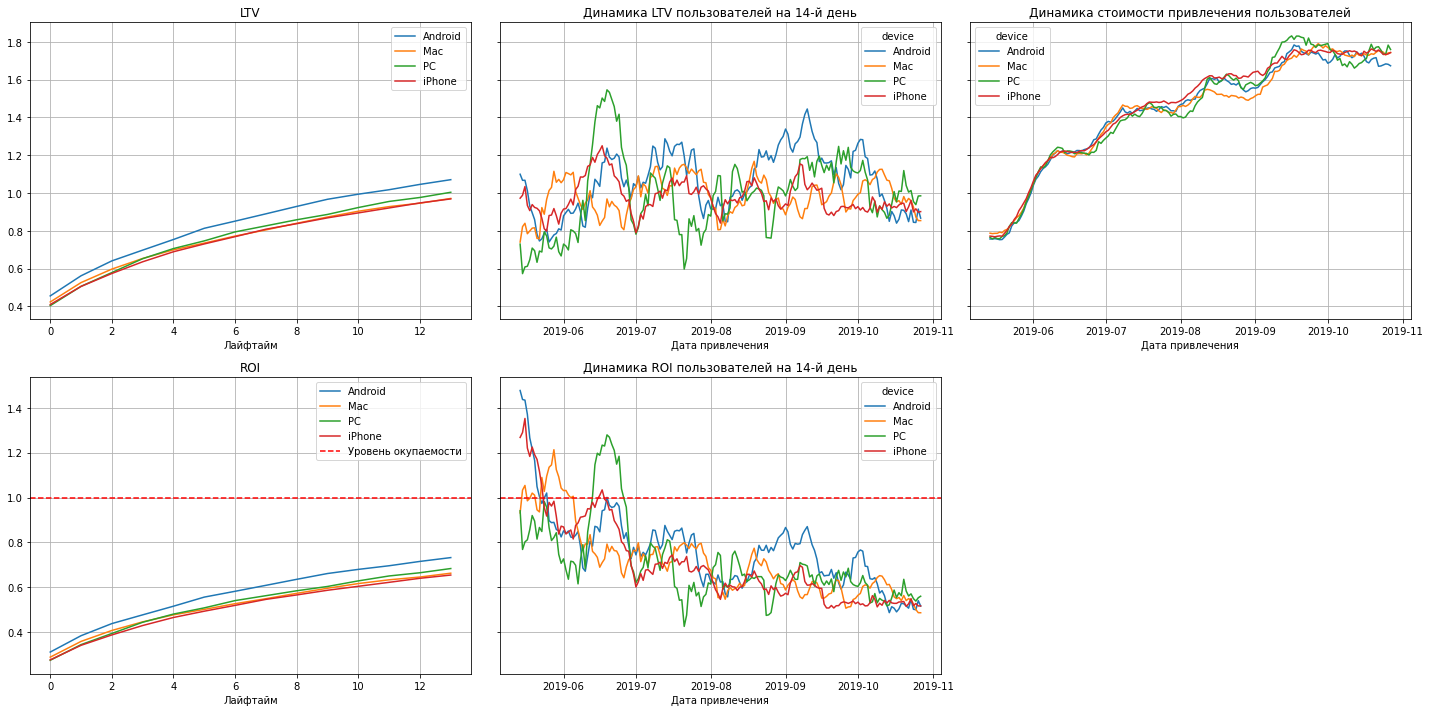

In [37]:

dimensions = ['device'] #смотрим окупаемость в разбивке по каналам в США 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Показатели ROI и LTV для США в разбивке по устройствам не имеют выраженных различий. 

Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

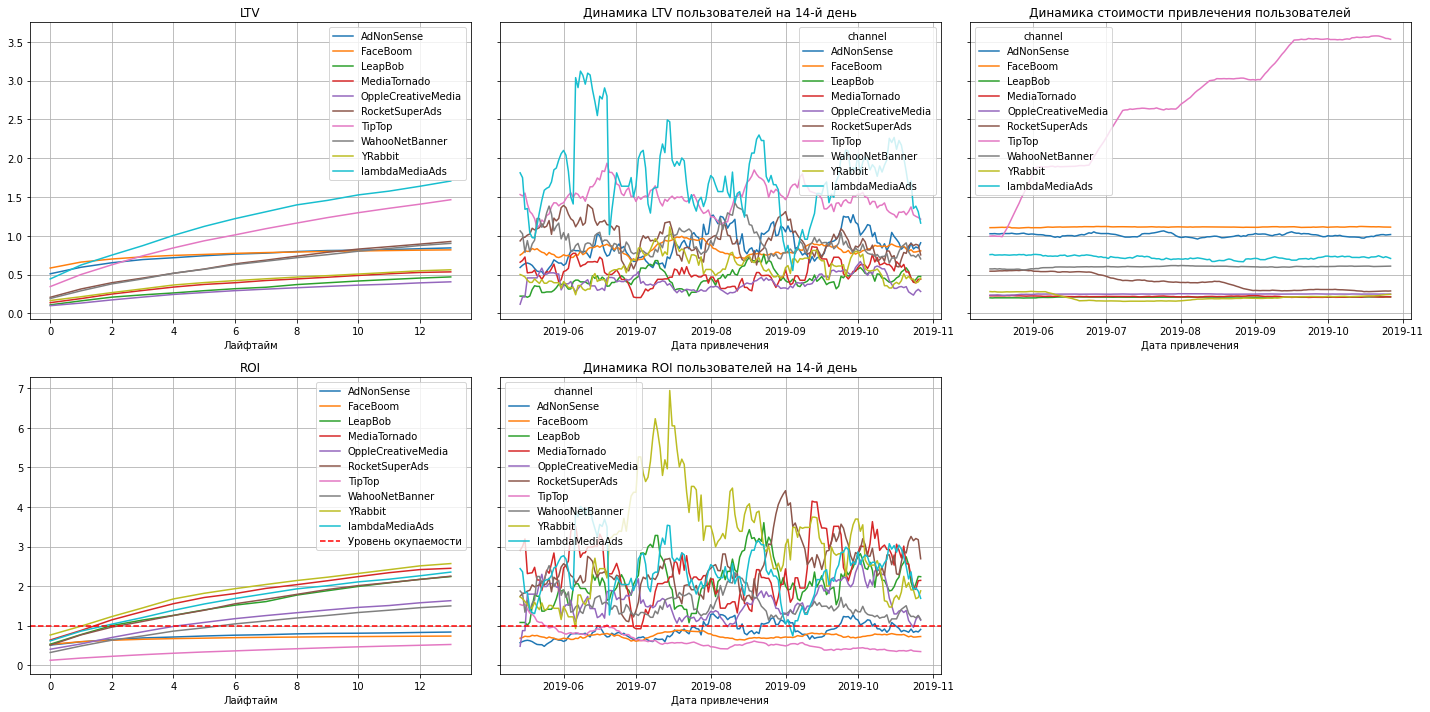

In [38]:
# смотрю окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стабильно не окупается реклама в каналах FaceBoom, TipTop и AdNonSense. При этом САС для TipTop стремительно растет. LTV по каналам TipTop и AdNonSense ощутимо выше, чем по другим каналам. 

Посмотрю, какие каналы привлечения окупаются в Европе:

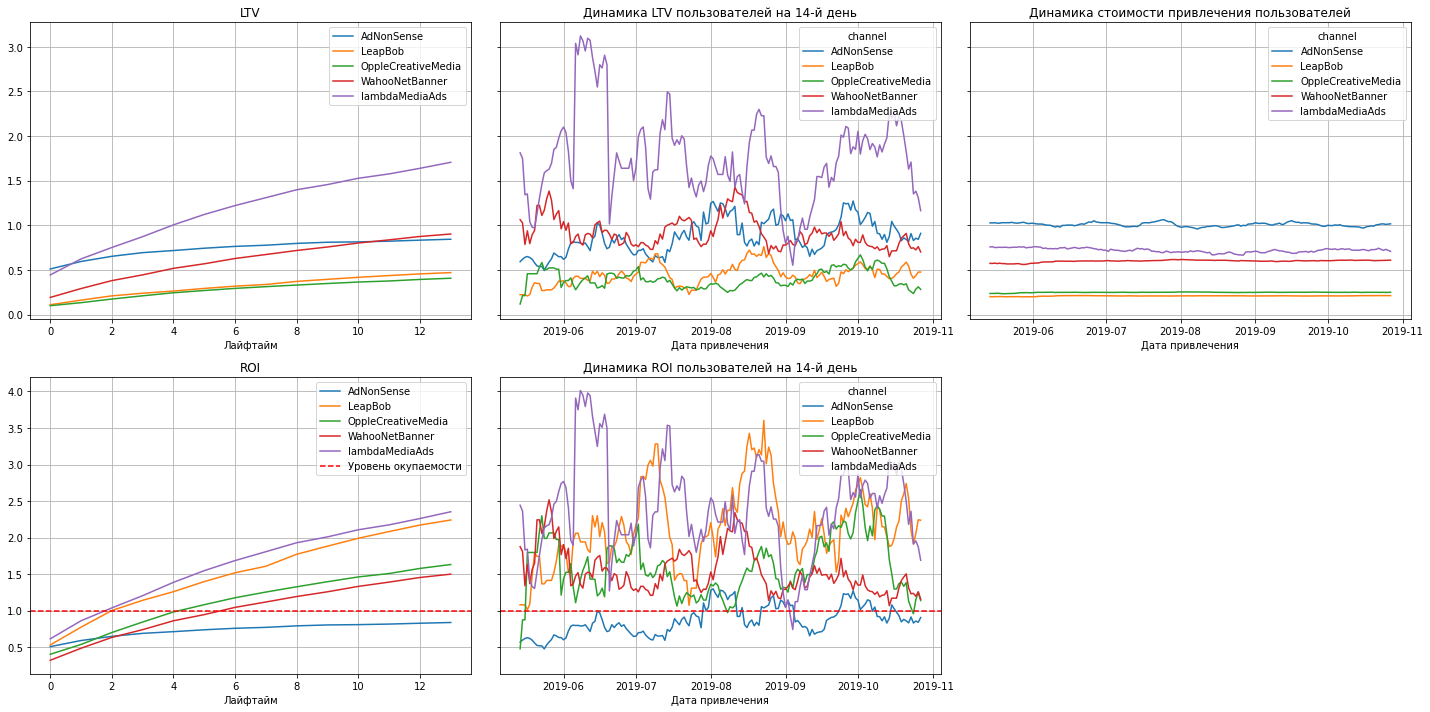

In [39]:
profiles_europe = profiles_new.query('region!="United States"')#выбираю пользователей из Европы

dimensions = ['channel'] #смотрю окупаемость в разбивке по каналам в Европе

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В Европе окупаются все каналы кроме AdNonSense

# Выводы


<a id="summary"></a>

[К ОГЛАВЛЕНИЮ](#back_to_title)

В результате проведенного анализа были сформированы следующие основные выводы: 

 - Реклама не окупается. ROI стремительно снижается на протяжениии двух недель
 - САС неуклонно растет
 - LTV к 14 дню закономерно растет,
 - LTV на 14 день имеет сезонность, но в целом стабилен.

К 14 лайфтайму начинает окупаться реклама только у пользователей PC и Android. При этои пользователи PC окупаются достаточно стабильно, в то время как пользователи Android далеко не всегда. САС для пользователей всех устройств растет в динамике. Тем не менее в динамике 14 дня для разных когорт мы видим, что окупаемость снижается для всех устройств.

*В качестве меры по увеличению эффективности рекламы можно отключить рекламу для PC или адаптировать рекламный формат/подачу для этого типа устройств.*

Стабильно окупается реклама во всех странах кроме США. При этом САС для США стремительно растет по сравнению с остальными регионами. При более детальном изучении показателей LTV и ROI в разрезе каналов для США стало очевидно, что реклама в TipTop и Face Boom не окупается, а CAC для  канала TipTop стремительно растет (CAC для FaceBoom стабилен). *По этим двум каналам в рекламные кампании необходимо внести изменения: попробовать протестировать другие рекламные подачи и аудитории.* 


К 14 дню конверсия составляет более 5% - хороший показатель.  При этом конверсия пользователей из США значительно выше конверсии по другим странам. При этом у США самое низкое удержание пользователей, остальные страны находятся примерно на одном уровне.

ТОП -3 канала по конверсии :  FaceBoom, AdNonSense, LambdaNediaAds. 
Самая низкая конверсия по пользователям PC, самая высокая - у пользователей  Mac и Iphone, что делает пользователей "яблочных" устройств более привлекателбными. 
 
Удержание по каналам AdNonSense и FaceBoom существенно ниже, чем удержание по другим каналам.

*Пользователи из США показывают хорошую конверсию, но низкое удержание. Необходимо дополнительно изучить причины, по которым пользователи не удерживаются, чтобы иметь возможность увеличить показатель удержания. 
То же самое качается каналов AdNonSense и FaceBoom - необходимо выяснить, каккая аудитория приходит из этих каналов и почему мы не можем ее удержать, чего не хватает пользователям.*

*Отдельно стоит отметить несколько перспективных каналов для разных регионов:*
- США: YRabbit, MediaTornado, RocketSuperAds. Реклама по ним стабильно окупается. Это значит, что эти каналы подходят для масштабирования. Можно пробовать направлять на них большее количество средств;
- Европа: окупаются все каналы кроме AdNonSense, значит все остальные каналы подходят для масштабирования.  





[К ОГЛАВЛЕНИЮ](#back_to_title)